In [1]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"


In [2]:
import pandas as pd
import requests
import bs4
from bs4 import BeautifulSoup
from requests import get

In [3]:
# url = 'https://www.rentdata.org/states/colorado/2021'
# url = 'https://www.nasdaq.com/market-activity/stocks/amzn/historical' 
# url = 'https://ycharts.com/companies/AMZN/price'
# url = 'https://markets.businessinsider.com/stocks/amzn-stock'
# url = 'https://www.barchart.com/stocks/quotes/AMZN/price-history/historical'
# url = 'https://seekingalpha.com/symbol/AMZN/earnings'
# url = 'https://marketchameleon.com/Overview/AMZN/DailyHistory/'
url = 'https://pandaforecast.com/stock_forecasts/forecast_amzn/for2024/'


In [4]:
soup = BeautifulSoup(requests.get(url).text, 'lxml')
stock_data = soup.find_all("table")
# len(stock_data)
table = stock_data[0]
thead = table.find_all('thead')[0]


In [5]:
d = {}
for header in thead.find_all('th'):
    pass
    column_name = header.text.replace('.','')\
                              .replace('%','')\
                              .replace(',','')\
                              .strip()
    d[column_name] = []
#     d

tbody = table.find_all('tbody')[0]

for row in tbody.find_all('tr'):
    pass
    cells = [ td for td in row.find_all('td')]
    cells = [ td.text for td in cells ]
    for td, column_name in zip(cells, d):
        pass
        d[column_name].append(td.replace(' ','')\
                                 .replace('%', '')
                             )
df = pd.DataFrame(d).set_index('Month')
df
        

,Target,Pes,Opt,Vol
Month,,,,
Jan,4001.58,3701.46,4289.70,13.71
Feb,4379.73,4222.06,4563.68,7.49
Mar,4530.83,4225.00,4768.70,11.40
Apr,4265.78,3760.28,4553.72,17.42
May,4061.02,3707.71,4420.42,16.12
Jun,4341.23,3963.54,4647.29,14.71
Jul,3787.72,3605.91,4088.85,11.81
Aug,3884.31,3528.90,4012.49,12.05
Sep,3389.06,3261.97,3511.07,7.09


In [59]:
for column in df.columns:
    pass
    # Convert DataFrame column from string to float
    df[column] = pd.to_numeric(df[column], downcast="float")
df.dtypes
df.head()

,Target,Pes,Opt,Vol
Month,,,,
Jan,4001.580078,3701.459961,4289.700195,13.710000
Feb,4379.729980,4222.060059,4563.680176,7.490000
Mar,4530.830078,4225.000000,4768.700195,11.400000
Apr,4265.779785,3760.280029,4553.720215,17.420000
May,4061.020020,3707.709961,4420.419922,16.120001


In [63]:
# df.drop(columns = ['Vol'], inplace=True)


In [65]:
df

,Target,Pes,Opt
Month,,,
Jan,4001.580078,3701.459961,4289.700195
Feb,4379.729980,4222.060059,4563.680176
Mar,4530.830078,4225.000000,4768.700195
Apr,4265.779785,3760.280029,4553.720215
May,4061.020020,3707.709961,4420.419922
Jun,4341.229980,3963.540039,4647.290039
Jul,3787.719971,3605.909912,4088.850098
Aug,3884.310059,3528.899902,4012.489990
Sep,3389.060059,3261.969971,3511.070068


# Plotly
---
<i> plotly for interactive charts, need to doesn't show on github  </i>

In [66]:
import plotly.express as px
for col in df.columns:
    pass
    fig = px.line(df, x=df.index, y=df[col], title='2024 Amazon '+ col)
#     fig.show()
    


# Matplotlib
---

In [67]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [68]:
dates = df.index

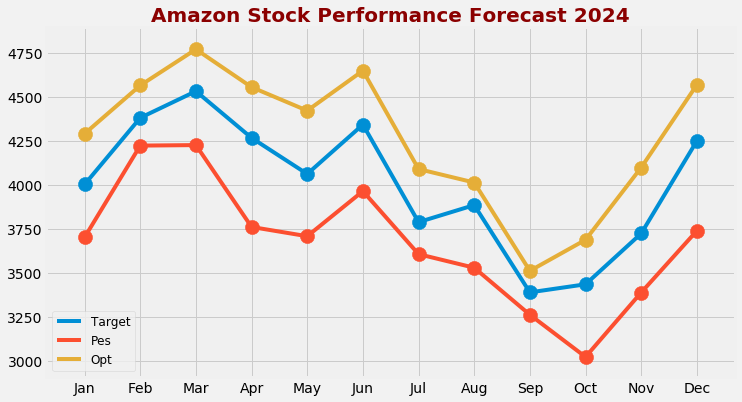

In [98]:
plt.figure(figsize=(11, 6), facecolor='0.95', )

for col in df.columns:
    pass
    values = df[col]
    plt.scatter(dates,values, s=200)
    plt.plot(dates, values)
    plt.legend(df.columns, fontsize=12,)
plt.grid(visible=True)
plt.title('Amazon Stock Performance Forecast 2024', fontsize=20, 
          color='darkred', weight='bold')
plt.show()
